Importing Library

In [1]:
import os, sklearn, math
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from joblib import dump, load

tf.random.set_seed(42)

Loading experimental data set

In [2]:
data = '230703_data_2' # Experimental data name
dataname = data+'Tension'+'_0703_2' # Ouput name
filename = 'myLearningData/'+data+'.csv' # Setting route of experimental data
SD = pd.read_csv(filename) # Loading experimental data to dataframe by pandas
SD=SD.iloc[:,:5] # Pandas code: (:)All row (5) five columns
SensorData = SD # Rename

In [3]:
SD

,Time,Displacement,Tension,Resistance,Stutus
0,20.03,0.00,-0.8,5.66,Stretching
1,20.03,0.00,-0.9,5.61,Stretching
2,20.04,0.00,-1.0,5.66,Stretching
3,20.06,0.02,-0.9,5.66,Stretching
4,20.07,0.03,-0.8,5.66,Stretching
...,...,...,...,...,...
8098,119.96,0.00,-1.4,5.78,Relaxing
8099,119.97,0.00,-1.4,5.78,Relaxing
8100,119.98,0.00,-1.3,5.84,Relaxing
8101,119.99,0.00,-1.3,5.78,Relaxing


In [4]:
SD.describe()

,Time,Displacement,Tension,Resistance
count,8103.000000,8103.000000,8103.000000,8103.000000
mean,70.001122,4.969625,21.136702,14.783712
std,28.870978,2.988501,13.288929,6.262151
min,20.030000,-0.010000,-2.400000,5.550000
25%,45.005000,2.370000,10.100000,8.580000
50%,69.990000,4.980000,21.500000,15.040000
75%,95.015000,7.550000,32.200000,20.820000
max,120.010000,9.970000,44.500000,24.660000


In [5]:
X = SD.iloc[:,[0,1]]
X

,Time,Displacement
0,20.03,0.00
1,20.03,0.00
2,20.04,0.00
3,20.06,0.02
4,20.07,0.03
...,...,...
8098,119.96,0.00
8099,119.97,0.00
8100,119.98,0.00
8101,119.99,0.00


In [7]:
SD['Resistance'] = (SD['Resistance']-SD['Resistance'].mean())/(SD['Resistance'].max()-SD['Resistance'].min())*2
SD['Displacement'] = (SD['Displacement']-SD['Displacement'].mean())/(SD['Displacement'].max()-SD['Displacement'].min())*2
SD['Tension'] = (SD['Tension']-SD['Tension'].mean())/(SD['Tension'].max()-SD['Tension'].min())*2

In [8]:
X = SD.iloc[:,[0,1]]
X['index'] = X.index+1
X = X[['index','Time','Displacement']]
y = SD.iloc[:,[2]]
#y['index'] = y.index+1
#y = y[['index','Time','Distance']]

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_42220\4070815710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['index'] = X.index+1


In [9]:
X.sample(5)

,index,Time,Displacement
1874,1875,43.13,-0.356638
6494,6495,100.17,-0.969865
5833,5834,91.97,0.599274
1316,1317,36.25,-0.292510
6681,6682,102.48,-0.492911


In [10]:
y.sample(5)

,Tension
7870,-0.585787
2627,0.267092
2999,-0.538879
2965,-0.479177
4216,0.339586


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.01, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.20, random_state=42)


In [12]:
X_sum = len(X_train)+len(X_valid)+len(X_test)
X_train_per = int(len(X_train)/X_sum*100)
X_valid_per = int(len(X_valid)/X_sum*100)
X_test_per = int(len(X_test)/X_sum*100)

print('X_train: ',len(X_train),'ea',X_train_per,'%   ', 
      'X_valid: ',len(X_valid),'ea',X_valid_per,'%   ',
      'X_test: ',len(X_test),'ea',X_test_per,'%',)

X_train:  6416 ea 79 %    X_valid:  1605 ea 19 %    X_test:  82 ea 1 %


In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_valid = X_valid.reshape((X_valid.shape[0], 1, X_valid.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [14]:
X_train.shape

(6416, 1, 3)

In [15]:
import pickle
from joblib import dump, load

file_name = 'myScaler/'+dataname+'_LSTM'+'_SS.pkl'
dump(scaler, file_name)

['myScaler/230703_data_2Tension_0703_2_LSTM_SS.pkl']

In [16]:
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.LSTM(16, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.LSTM(16, return_sequences=True),
    keras.layers.LSTM(16),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.RMSprop(learning_rate=1e-3, rho = 0.9))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 16)             1280      
                                                                 
 lstm_1 (LSTM)               (None, 1, 16)             2112      
                                                                 
 lstm_2 (LSTM)               (None, 16)                2112      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 5,521
Trainable params: 5,521
Non-trainable params: 0
_________________________________________________________________


## Callback (best, early stopping, tensorboard)

In [18]:
import os 
#root_logdir = os.path.join(os.curdir, 'mylog/'+data)
root_logdir = os.path.join(os.curdir, 'mylog/'+'230703')

def get_run_logdir():
    import time
    run_id= time.strftime("%m%d_%Hh%Mm%Ss"+dataname)
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [19]:
K = keras.backend
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [20]:
dataname

'230703_data_2Tension_0703_2'

In [21]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
n_epochs = 1000
batch_size = 1
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[onecycle,early_stopping_cb,tensorboard_cb])
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:5]
y_pred = model.predict(X_new)

Epoch 1/1000
201/201 [==============================] - 8s 12ms/step - loss: 0.0541 - val_loss: 0.0274
Epoch 2/1000
201/201 [==============================] - 1s 6ms/step - loss: 0.0253 - val_loss: 0.0258
Epoch 3/1000
201/201 [==============================] - 1s 6ms/step - loss: 0.0241 - val_loss: 0.0249
Epoch 4/1000
201/201 [==============================] - 1s 6ms/step - loss: 0.0237 - val_loss: 0.0216
Epoch 5/1000
201/201 [==============================] - 1s 6ms/step - loss: 0.0230 - val_loss: 0.0229
Epoch 6/1000
201/201 [==============================] - 1s 6ms/step - loss: 0.0229 - val_loss: 0.0221
Epoch 7/1000
201/201 [==============================] - 1s 6ms/step - loss: 0.0227 - val_loss: 0.0236
Epoch 8/1000
201/201 [==============================] - 1s 6ms/step - loss: 0.0225 - val_loss: 0.0213
Epoch 9/1000
201/201 [==============================] - 1s 6ms/step - loss: 0.0225 - val_loss: 0.0255
Epoch 10/1000
201/201 [==============================] - 1s 6ms/step - loss: 0.02

In [22]:
%load_ext tensorboard
%tensorboard --logdir=./mylog/230703 --port=9360

Reusing TensorBoard on port 9360 (pid 25652), started 0:26:48 ago. (Use '!kill 25652' to kill it.)

In [23]:
model.save('H:/Jupyter_project/wearableActuator/myModel/'+dataname+'_LSTM'+'.h5')

In [24]:
model = tf.keras.models.load_model('myModel/'+dataname+'_LSTM'+'.h5')
scaler = load(file_name)
valid_predictions = model.predict(X_valid)

51/51 [==============================] - 1s 2ms/step


In [25]:
X_valid

array([[[-1.48360994, -1.48320576,  0.72305621]],

       [[-0.17637992, -0.17654437, -0.07089352]],

       [[-1.20513915, -1.20489035, -0.03739353]],

       ...,

       [[ 0.10636846,  0.10593017,  0.70630622]],

       [[-0.18664612, -0.18694221, -0.17139348]],

       [[ 0.68897556,  0.68820898,  1.65100589]]])

In [26]:
valid_predictions

array([[ 0.45367151],
       [-0.01500165],
       [ 0.0441673 ],
       ...,
       [ 0.3696944 ],
       [-0.06217124],
       [ 0.9111729 ]], dtype=float32)

In [27]:
X_test[0]

array([[-0.51815897, -0.51828658,  0.02625645]])

In [28]:
arr = X_test
X_test0 = arr[:1]
X_test0

array([[[-0.51815897, -0.51828658,  0.02625645]]])

In [29]:
valid_predictions_df=pd.DataFrame(valid_predictions)
valid_predictions_df.columns = ["Tension"]
valid_predictions_df

,Tension
0,0.453672
1,-0.015002
2,0.044167
3,-0.469032
4,0.131737
...,...
1600,0.425406
1601,-0.798542
1602,0.369694
1603,-0.062171


In [30]:
k= y_valid.to_numpy()
k_df = pd.DataFrame(k)
k_df.columns  = ["Valid_Tension"]
k_df

,Valid_Tension
0,0.552806
1,0.169011
2,-0.180670
3,-0.636960
4,0.318264
...,...
1600,0.582657
1601,-0.709454
1602,0.190333
1603,0.117838


In [31]:
k_df.describe()

,Valid_Tension
count,1605.000000
mean,-0.008928
std,0.569985
min,-1.003697
25%,-0.491970
50%,0.015492
75%,0.467518
max,0.996303


In [32]:
ValidPre = pd.concat( [k_df,valid_predictions_df],axis=1)
ValidPre.head(5)
corr = ValidPre.corr()
print("corr")
for i in range(0,1):    
    print(format(corr[valid_predictions_df.columns[i]][k_df.columns[i]]*100,'.2f')+'%',k_df.columns[i])
corr

corr
96.69% Valid_Tension


,Valid_Tension,Tension
Valid_Tension,1.000000,0.966851
Tension,0.966851,1.000000


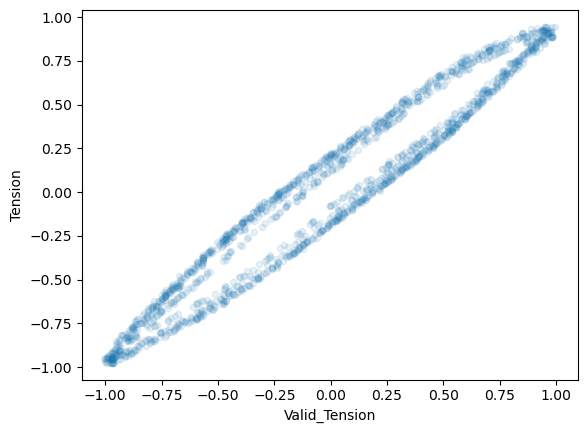

In [33]:
alpa=0.1

ValidPre.plot(kind="scatter", x= "Valid_Tension",y= "Tension",alpha = alpa)
plt.savefig('H:/Jupyter_project/wearableActuator/savefig/'+dataname+'.png')
